<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Case" data-toc-modified-id="Business-Case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Case</a></span></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Strategy</a></span></li><li><span><a href="#Obtain-[data]" data-toc-modified-id="Obtain-[data]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Obtain [data]</a></span><ul class="toc-item"><li><span><a href="#Column-Names-and-descriptions-for-Kings-County-Data-Set" data-toc-modified-id="Column-Names-and-descriptions-for-Kings-County-Data-Set-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Column Names and descriptions for Kings County Data Set</a></span></li></ul></li><li><span><a href="#Scrub-(Data-Preparation)" data-toc-modified-id="Scrub-(Data-Preparation)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scrub (Data Preparation)</a></span><ul class="toc-item"><li><span><a href="#Fix-datatypes" data-toc-modified-id="Fix-datatypes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fix datatypes</a></span><ul class="toc-item"><li><span><a href="#date" data-toc-modified-id="date-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>date</a></span></li><li><span><a href="#bedrooms/bathrooms" data-toc-modified-id="bedrooms/bathrooms-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>bedrooms/bathrooms</a></span></li><li><span><a href="#sqft_living/sqft_lot" data-toc-modified-id="sqft_living/sqft_lot-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>sqft_living/sqft_lot</a></span></li><li><span><a href="#floors" data-toc-modified-id="floors-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>floors</a></span></li><li><span><a href="#waterfront" data-toc-modified-id="waterfront-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>waterfront</a></span></li><li><span><a href="#view" data-toc-modified-id="view-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>view</a></span></li><li><span><a href="#condition" data-toc-modified-id="condition-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>condition</a></span></li><li><span><a href="#grade" data-toc-modified-id="grade-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>grade</a></span></li><li><span><a href="#sqft_above" data-toc-modified-id="sqft_above-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>sqft_above</a></span></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>sqft_basement</a></span></li><li><span><a href="#yr_built" data-toc-modified-id="yr_built-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>yr_built</a></span></li><li><span><a href="#yr_renovated" data-toc-modified-id="yr_renovated-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span>yr_renovated</a></span></li><li><span><a href="#zipcode" data-toc-modified-id="zipcode-4.1.13"><span class="toc-item-num">4.1.13&nbsp;&nbsp;</span>zipcode</a></span></li><li><span><a href="#lat/long" data-toc-modified-id="lat/long-4.1.14"><span class="toc-item-num">4.1.14&nbsp;&nbsp;</span>lat/long</a></span></li><li><span><a href="#sqft_living15" data-toc-modified-id="sqft_living15-4.1.15"><span class="toc-item-num">4.1.15&nbsp;&nbsp;</span>sqft_living15</a></span></li></ul></li><li><span><a href="#Final-Check" data-toc-modified-id="Final-Check-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Final Check</a></span></li></ul></li><li><span><a href="#Explore-(Data-Understanding)" data-toc-modified-id="Explore-(Data-Understanding)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore (Data Understanding)</a></span><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Questions</a></span><ul class="toc-item"><li><span><a href="#Does-floors-include-basement?" data-toc-modified-id="Does-floors-include-basement?-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Does floors include basement?</a></span></li><li><span><a href="#Does-living-sqft-include-finished-basement-area?" data-toc-modified-id="Does-living-sqft-include-finished-basement-area?-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Does living sqft include finished basement area?</a></span></li><li><span><a href="#Lat-Long" data-toc-modified-id="Lat-Long-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Lat Long</a></span></li></ul></li><li><span><a href="#Correlations-and-Multicolinearity" data-toc-modified-id="Correlations-and-Multicolinearity-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Correlations and Multicolinearity</a></span><ul class="toc-item"><li><span><a href="#Multicolinearity" data-toc-modified-id="Multicolinearity-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Multicolinearity</a></span></li></ul></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Setup-stepwise-feature-selection" data-toc-modified-id="Setup-stepwise-feature-selection-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Setup stepwise feature selection</a></span></li><li><span><a href="#Setup-Recursive-feature-elimination" data-toc-modified-id="Setup-Recursive-feature-elimination-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Setup Recursive feature elimination</a></span></li><li><span><a href="#Evaluate-model-assumptions" data-toc-modified-id="Evaluate-model-assumptions-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Evaluate model assumptions</a></span><ul class="toc-item"><li><span><a href="#Linearity" data-toc-modified-id="Linearity-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Linearity</a></span></li><li><span><a href="#Normality" data-toc-modified-id="Normality-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Normality</a></span></li><li><span><a href="#Homoscedasticity" data-toc-modified-id="Homoscedasticity-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Homoscedasticity</a></span></li></ul></li><li><span><a href="#Model-2:-Drop-price-outliers" data-toc-modified-id="Model-2:-Drop-price-outliers-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model 2: Drop price outliers</a></span></li></ul></li><li><span><a href="#Model-3-[geographical-data]" data-toc-modified-id="Model-3-[geographical-data]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model 3 [geographical data]</a></span></li></ul></div>

![SSS logo](images/facebook_cover_photo_2.png)

# Business Case

Sam Samson and Sons is a real estate developer looking to adopt a data driven approach to choosing which properties to acquire, remodel, and bring back to market. In particular they want a model to answer the following questions:

1. Which upgrades will yield the highest return?
   - Examples:
     - what is the value of adding a bathroom?
     - what is the value of moving up one or more categories in the quality ranking?
   - Are certain upgrades more valuable in certain areas? If so which factors determine best value remodeling projects?
2. Determine the profit potential of a remodel on a listing.  i.e. how much more can a remodel sell for after taking certain steps like adding a bathroom.

# Strategy

To organize the process for answering SS&S's question this report will use the OSEMN workflow.
OSEMN stands for Obtain, Scrub, Explore, Model, Interpret.

# Obtain [data]
The data for this analysis was given to us by the client.  The dataset contains approximately one year of sales data from 05/02/2014, 05/27/2015.

## Column Names and descriptions for Kings County Data Set

**Updated from [https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/207885]**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - An index from 0 to 4 of how good the view of the property was
* **condition** - How good the condition is ( Overall )
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Scrub (Data Preparation)

This section contains all of the basic data cleaning for the data set including:
* Fixing and understanding datatypes including Categorical vs Continuous
* Identifying and dealing with missing data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = 30

In [2]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Obvious missing values.
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Create preprocessed df with fixed values
df_pp = df[['price']].copy()
df_pp.head(2)

,price
id,
7129300520,221900.0
6414100192,538000.0


## Fix datatypes

### date

In [7]:
# convert date to datetime so it is useful
df_pp['date'] = pd.to_datetime(df['date'])

In [8]:
# Check the daterange
df_pp['date'].min(), df_pp['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

### bedrooms/bathrooms

In [9]:
# Should Bathrooms be float?
df['bathrooms'].value_counts(ascending = False).head()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64

Because bathrooms can have $\frac{1}{2}$, $\frac{3}{4}$ sizes the float type is correct for this column. 

It is unclear whether the model should treat number of bedrooms and bathrooms as categorical or continuous.  My suspicion is that there will be more value in treating them as categorical, but for now we will leave them as continuous and later see if the change results in an improvement to the model.

In [10]:
df_pp['bathrooms'] = df['bathrooms']
df_pp.head(2)

,price,date,bathrooms
id,,,
7129300520,221900.0,2014-10-13,1.00
6414100192,538000.0,2014-12-09,2.25


### sqft_living/sqft_lot

In [11]:
# are there missing values
print(df['sqft_living'].min())
print(df['sqft_living'].isna().sum())
print(df['sqft_living'].dtype)

370
0
int64


In [12]:
# are there missing values
print(df['sqft_lot'].min())
print(df['sqft_lot'].isna().sum())
print(df['sqft_lot'].dtype)

520
0
int64


In [13]:
df_pp[['sqft_living', 'sqft_lot']] = df[['sqft_living', 'sqft_lot']]
df_pp.head(2)

,price,date,bathrooms,sqft_living,sqft_lot
id,,,,,
7129300520,221900.0,2014-10-13,1.00,1180,5650
6414100192,538000.0,2014-12-09,2.25,2570,7242


### floors

In [14]:
# are there missing values
print('Num rows with missing data:', df['floors'].isna().sum())
print('Min # of floors:', df['floors'].min())
print('Max # of floors:', df['floors'].max())
print(df['floors'].dtype)

Num rows with missing data: 0
Min # of floors: 1.0
Max # of floors: 3.5
float64


What does 3.5 floors mean???  Are there other decimal floor values??

In [15]:
df[(df['floors'] % 1) > 0].floors.value_counts()

1.5    1910
2.5     161
3.5       7
Name: floors, dtype: int64

    Real Estate Agent Explains 1.5 Storeys
    1.5-storey houses are not the same as semi-bungalows, although it is easy to mix them up. The difference here is that 1.5-storey houses do no have a second floor in the attic, but have a true second floor, it’s just not as large as the main floor.

source: [https://www.gimme-shelter.com/what-is-a-1-5-storey-house-50104/#:~:text=A%20one%2Dand%2Da%2D,is%20off%20to%20one%20side.]

In this case we may want to create another value for the number of floors regardless of size.


In [16]:
df_pp['floors'] = df['floors']
df_pp['floor_count'] = pd.cut(df['floors'], [0,1,2,3,4], labels=[1,2,3,4]).astype('int')
df_pp['floor_count'].unique()

array([1, 2, 3, 4])

### waterfront

In [17]:
df['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [18]:
# waterfront is already categorical. But has missing values.
df['waterfront'].value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [19]:
# 99.2% of the properties are not waterfront.  We will fill the missing values with 0.
df_pp['waterfront'] = df['waterfront'].fillna(0)

# change to int first to get rid of decimal then cast as category
df_pp['waterfront'] = df_pp['waterfront'].astype('int')# .astype('category')
df_pp['waterfront'].head(2)

id
7129300520    0
6414100192    0
Name: waterfront, dtype: int64

### view

In [20]:
print('Num missing values:', df['view'].isna().sum())
print('Median:', df['view'].median())
print('Percent of values that are 0:', len(df[df['view']==0])/len(df))


Num missing values: 63
Median: 0.0
Percent of values that are 0: 0.8992915682733713


In [21]:
# 89% of values are 0.  We can fill na with the median 0.
df_pp['view'] = df['view'].fillna(0)

View is a number, but could easily have been a description like none, good, great, etc.  It seems unlikely that the value change between steps would be equal, and the values the constrained from 0-4.  Cast a category.

In [22]:
df_pp['view'] = df_pp['view'].astype('int') #.astype('category')
df_pp['view'].head(2)

id
7129300520    0
6414100192    0
Name: view, dtype: int64

### condition

In [23]:
print('Num missing values:', df['condition'].isna().sum())
print('Median:', df['condition'].median())


Num missing values: 0
Median: 3.0


In [24]:
df['condition'].describe()

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

Values range from 1-5.  No missing values.  Cast as categorical

In [25]:
df_pp['condition'] = df['condition'].astype('int')# .astype('category')
df_pp['condition'].dtype

dtype('int64')

### grade

From the description grade is could not be changed by a remodel as it assess construction and design quality.  This would be useful for assessing price but may not be directly correlated with condition.

In [26]:
print('Num missing values:', df['grade'].isna().sum())
print('Num 0 values:', len(df[df['grade'] == 0]))
print('Median:', df['grade'].median())

Num missing values: 0
Num 0 values: 0
Median: 7.0


In [27]:
# Should this be changed to only 3 categories??  To explore later for now make each one a category.
df_pp['grade'] = df['grade'].astype('int')# .astype('category')
df_pp['grade'].dtype

dtype('int64')

### sqft_above

In [28]:
print('Num missing values:', df['sqft_above'].isna().sum())
print('dtype:', df['sqft_above'].dtype)

Num missing values: 0
dtype: int64


In [29]:
df_pp['sqft_above'] = df['sqft_above']
df_pp.head(2)

,price,date,bathrooms,sqft_living,sqft_lot,floors,floor_count,waterfront,view,condition,grade,sqft_above
id,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,1.00,1180,5650,1.0,1,0,0,3,7,1180
6414100192,538000.0,2014-12-09,2.25,2570,7242,2.0,2,0,0,3,7,2170


### sqft_basement

In [30]:
# Why is sqft_basement an object?
df['sqft_basement'].value_counts(ascending= False, normalize=True).head()

0.0      0.593879
?        0.021021
600.0    0.010048
500.0    0.009677
700.0    0.009631
Name: sqft_basement, dtype: float64

In [31]:
# '?' must mean unknown.  Since 0 accounts for 60% of the records the median
# should be 0.  Check to make sure.
df[df['sqft_basement'] != '?']['sqft_basement'].astype('float').median()


0.0

In [32]:
# The median is 0 and 60% of the values are 0 so we will fill the ? values
# with 0
df_pp['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x == '?' else x)

# cast as int
# the string '0.0' cannot be directly cast as int
df_pp['sqft_basement'] = df_pp['sqft_basement'].astype('float').astype('int') 
df_pp['has_basement'] = df_pp['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df_pp['has_basement'] = df_pp['has_basement'] #.astype('category')
df_pp.head(2)

,price,date,bathrooms,sqft_living,sqft_lot,floors,floor_count,waterfront,view,condition,grade,sqft_above,sqft_basement,has_basement
id,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,1.00,1180,5650,1.0,1,0,0,3,7,1180,0,0
6414100192,538000.0,2014-12-09,2.25,2570,7242,2.0,2,0,0,3,7,2170,400,1


### yr_built

In [33]:
print('Num missing values:', df['yr_built'].isna().sum())

Num missing values: 0


In [34]:
df['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

The range is 1900 - 2015 which are all valid years.  Need to figure out why the col is float since there are no NA.


In [35]:
# Check if any years have decimals
(df['yr_built'] % 1).sum()

0

In [36]:
# No decimals and no missing values.  Cast as int
df_pp['yr_built'] = df['yr_built'].astype('int')

### yr_renovated

In [37]:
df['yr_renovated'].isna().sum() / len(df)

0.17789507802009538

In [38]:
len(df[df['yr_renovated'] == 0]) / len(df)

0.787655692920313

In [39]:
# Since 79% of the data is 0 we will fill the missing values with 0 (median.)
df_pp['yr_renovated'] = df['yr_renovated'].fillna(0)

In [40]:
df_pp['yr_renovated'].value_counts(ascending=False, normalize=True)

0.0       0.965551
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
2007.0    0.001389
            ...   
1946.0    0.000046
1959.0    0.000046
1971.0    0.000046
1951.0    0.000046
1954.0    0.000046
Name: yr_renovated, Length: 70, dtype: float64

The year with the most renovations is 2014 which only accounts for 0.3% of the data.  In order for this column to be useful we will have to bin it.  Look for max min values and choose a inflection point for the variable.

In [41]:
# Check if any years have decimals
(df_pp['yr_renovated'] % 1).sum()

0.0

In [42]:
df_pp['yr_renovated'] = df_pp['yr_renovated'].astype('int')
df_pp['yr_renovated'].dtype

dtype('int64')

In [43]:
df_pp[df_pp['yr_renovated'] > 0].yr_renovated.describe()

count     744.000000
mean     1995.928763
std        15.599946
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.250000
max      2015.000000
Name: yr_renovated, dtype: float64

- Create a category for no remodel.
- Create a category for remodeled after 2000
- Create a category for remodeled in 2000 or before

If this turns out to be useful we can see if adjusting the inflection point makes a difference.

In [44]:
df_pp['renovation_cat'] = pd.cut(df_pp['yr_renovated'], 
                          [-1,0,2000,2015], 
                          labels=['none', 'before_2000', '2000_and_after' ])
df_pp.head(2)

,price,date,bathrooms,sqft_living,sqft_lot,floors,floor_count,waterfront,view,condition,grade,sqft_above,sqft_basement,has_basement,yr_built,yr_renovated,renovation_cat
id,,,,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,1.00,1180,5650,1.0,1,0,0,3,7,1180,0,0,1955,0,none
6414100192,538000.0,2014-12-09,2.25,2570,7242,2.0,2,0,0,3,7,2170,400,1,1951,1991,before_2000


### zipcode

In [45]:
print('Num missing values:', df['zipcode'].isna().sum())

Num missing values: 0


In [46]:
df['zipcode'].describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [47]:
# Check if any years have decimals
(df['zipcode'] % 1).sum()

0

In [48]:
# cast as categorical
df_pp['zipcode'] = df['zipcode'].astype('int') #.astype('category')
df_pp['zipcode'].head(2)

id
7129300520    98178
6414100192    98125
Name: zipcode, dtype: int64

### lat/long
We want this for visualizations.  If we want to use it for price prediction we could bin east west of x long, but we have zipcodes which may be more useful.  For now just check that there are no missing values.

In [49]:
# Check for Nan
df[['lat', 'long']].isna().sum()

lat     0
long    0
dtype: int64

In [50]:
# check for inconsistent values
df[['lat', 'long']].describe()

,lat,long
count,21597.000000,21597.000000
mean,47.560093,-122.213982
std,0.138552,0.140724
min,47.155900,-122.519000
25%,47.471100,-122.328000
50%,47.571800,-122.231000
75%,47.678000,-122.125000
max,47.777600,-121.315000


Std is low, min max are close together for both values. All houses seem to have lat/long data.

In [51]:
df_pp[['lat', 'long']] = df[['lat', 'long']]

### sqft_living15
    

In [52]:
# check for missing values
df[['sqft_living15','sqft_lot15']].isna().sum()

sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
df[['sqft_living15', 'sqft_lot15']].describe()

,sqft_living15,sqft_lot15
count,21597.000000,21597.000000
mean,1986.620318,12758.283512
std,685.230472,27274.441950
min,399.000000,651.000000
25%,1490.000000,5100.000000
50%,1840.000000,7620.000000
75%,2360.000000,10083.000000
max,6210.000000,871200.000000


There is at least one very large property but that makes sense.  In exploration we will see if we need to transform the data or remove the outliers.

In [54]:
df[['sqft_living15', 'sqft_lot15']].dtypes

sqft_living15    int64
sqft_lot15       int64
dtype: object

In [55]:
df_pp[['sqft_living15', 'sqft_lot15']] = df[['sqft_living15', 'sqft_lot15']]
df_pp.head(2)

,price,date,bathrooms,sqft_living,sqft_lot,floors,floor_count,waterfront,view,condition,grade,sqft_above,sqft_basement,has_basement,yr_built,yr_renovated,renovation_cat,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,1.00,1180,5650,1.0,1,0,0,3,7,1180,0,0,1955,0,none,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,2014-12-09,2.25,2570,7242,2.0,2,0,0,3,7,2170,400,1,1951,1991,before_2000,98125,47.7210,-122.319,1690,7639


## Final Check

In [56]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           21597 non-null  float64       
 1   date            21597 non-null  datetime64[ns]
 2   bathrooms       21597 non-null  float64       
 3   sqft_living     21597 non-null  int64         
 4   sqft_lot        21597 non-null  int64         
 5   floors          21597 non-null  float64       
 6   floor_count     21597 non-null  int64         
 7   waterfront      21597 non-null  int64         
 8   view            21597 non-null  int64         
 9   condition       21597 non-null  int64         
 10  grade           21597 non-null  int64         
 11  sqft_above      21597 non-null  int64         
 12  sqft_basement   21597 non-null  int64         
 13  has_basement    21597 non-null  int64         
 14  yr_built        21597 non-null  int64   

In [57]:
# track cols to change to categoricals later
target = 'price'

categoricals = set(df_pp.dtypes[(df_pp.dtypes == 'category')].index)
print('categoricals:', categoricals)

continuous = set(df_pp.dtypes[(df_pp.dtypes == 'float64') 
                          | (df_pp.dtypes == 'int64')].index)
continuous.discard('price')

print('continuous:', continuous)

dropped = {'date'}

categoricals: {'renovation_cat'}
continuous: {'grade', 'yr_renovated', 'sqft_living', 'sqft_basement', 'sqft_lot15', 'waterfront', 'sqft_above', 'floor_count', 'zipcode', 'sqft_lot', 'sqft_living15', 'lat', 'view', 'bathrooms', 'condition', 'floors', 'long', 'yr_built', 'has_basement'}


In [58]:
# Set variables
#X = df_pp.drop('price', axis = 1)
#y = df_pp['price']

# Explore (Data Understanding)
## Questions
### Does floors include basement?

In [59]:
# Are there any cases where foor_count is not larger than basement?
df_pp[df_pp['floor_count'].astype('int') 
      <= df_pp['has_basement'].astype('int')
     ][['has_basement', 'floor_count']]

,has_basement,floor_count
id,,
2487200875,1,1
7237550310,1,1
2414600126,1,1
1736800520,1,1
9212900260,1,1
...,...,...
123059127,1,1
2924079034,1,1
6031400092,1,1


It seems pretty unlikely that there are 5415 basement only houses so we are going to assume that basement is not included in the `floors`

### Does living sqft include finished basement area?

In [60]:
df_pp[['sqft_living', 
       'sqft_above',
       'sqft_basement']][df_pp['has_basement'] == 1]

,sqft_living,sqft_above,sqft_basement
id,,,
6414100192,2570,2170,400
2487200875,1960,1050,910
7237550310,5420,3890,1530
2414600126,1780,1050,730
1736800520,3560,1860,1700
...,...,...,...
2767600688,1210,1020,190
7430200100,4910,3110,1800
1972201967,1530,1480,50


In [61]:
# Are there cases where all the basement area isn't accounted for in `sqft_living`?
(~(df_pp['sqft_living'] - df_pp['sqft_basement'] == df_pp['sqft_above'])).sum()

170

In [62]:
# Interesting.  Take a closer look at those.
uf_bsmt = df_pp[~(df_pp['sqft_living'] - df_pp['sqft_basement'] 
        == df_pp['sqft_above'])].copy()
uf_bsmt['sqft_finished_basement'] = uf_bsmt['sqft_living'] - uf_bsmt['sqft_above']


In [63]:
uf_bsmt['sqft_unfinished_basement'] = uf_bsmt['sqft_basement'] - uf_bsmt['sqft_finished_basement']
uf_bsmt[['sqft_basement','sqft_unfinished_basement', 'sqft_finished_basement']]

,sqft_basement,sqft_unfinished_basement,sqft_finished_basement
id,,,
2525310310,0,-380,380
3626039325,0,-1600,1600
3204800200,0,-1100,1100
713500030,0,-1320,1320
5113400431,0,-720,720
...,...,...,...
291310180,0,-120,120
3438500250,0,-870,870
3278600680,0,-100,100


**Conclusion** The `sqft_basement` is not included in `sqft_living`.

    Total square feet is just that. The total foot print the home will take up. This area includes garages, porches, patios, and any area under the main roof. This sometimes will include detached structures like detached garages, guest suites, or cabanas.
source[https://saterdesign.com/blogs/news/living-area-explained ]

### Lat Long

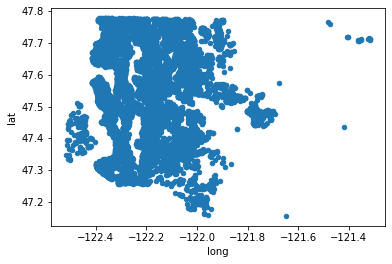

In [64]:
df_pp[['lat', 'long']].plot.scatter(y='lat', x='long')

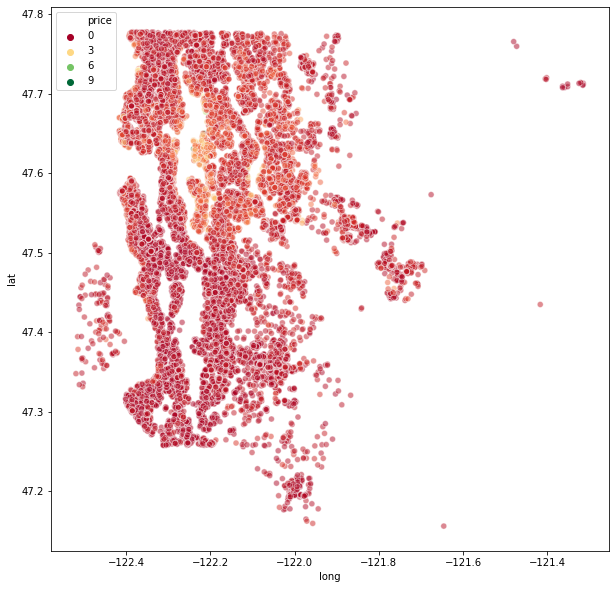

In [65]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', 
                alpha= .5, hue='price', palette='RdYlGn',
                data=df_pp)

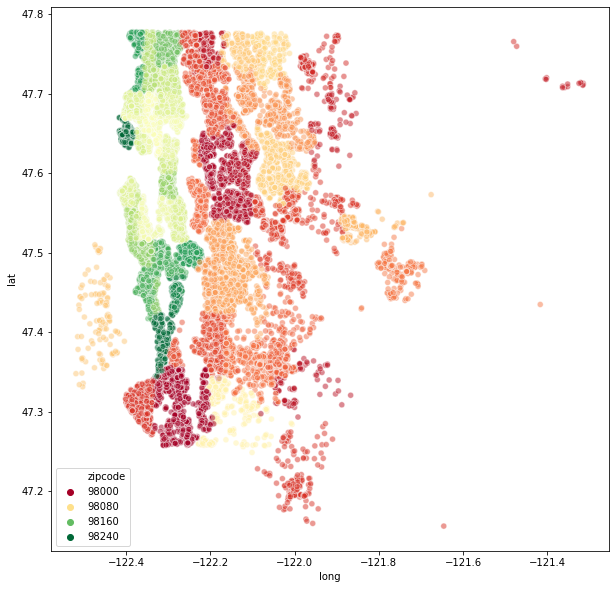

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', 
                alpha= .5, hue='zipcode', palette='RdYlGn',
                data=df_pp)

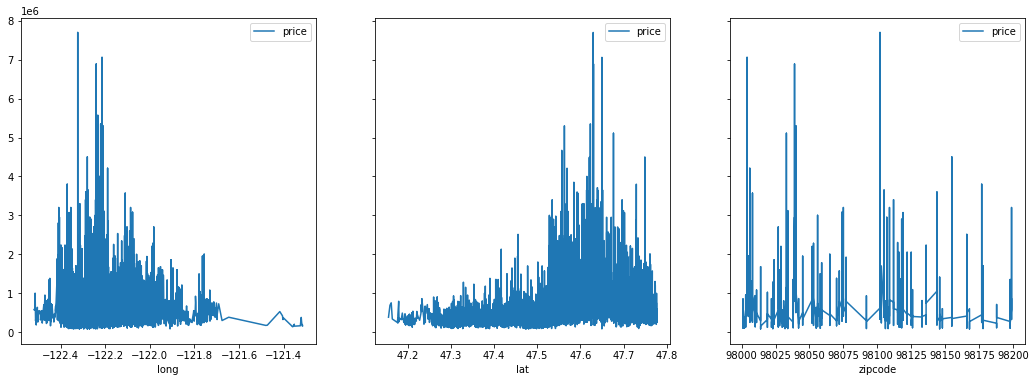

In [67]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=(18,6))

df_pp.sort_values(by='long').plot(x='long', y='price', ax=axs[0])
df_pp.sort_values(by='lat').plot(x='lat', y='price', ax=axs[1])
df_pp.sort_values(by='zipcode').plot(x='zipcode', y='price', ax=axs[2])


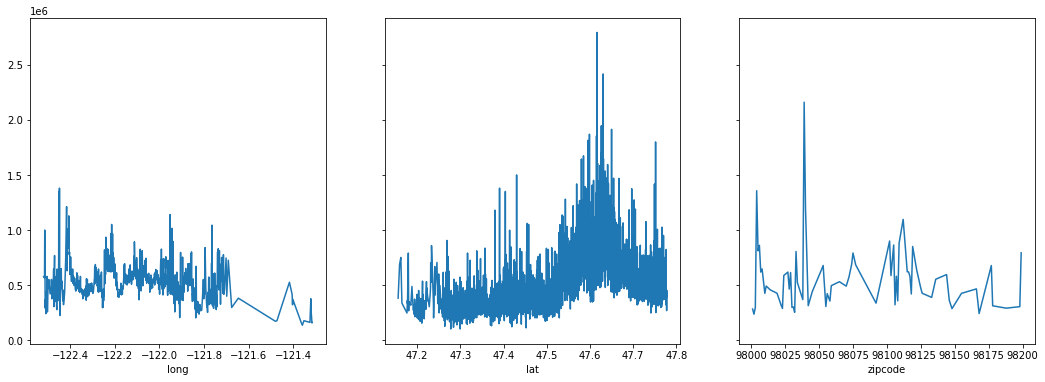

In [68]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=(18,6))

df_pp.groupby('long').mean()['price'].plot(ax=axs[0])
df_pp.groupby('lat').mean()['price'].plot(ax=axs[1])
df_pp.groupby('zipcode').mean()['price'].plot(ax=axs[2])


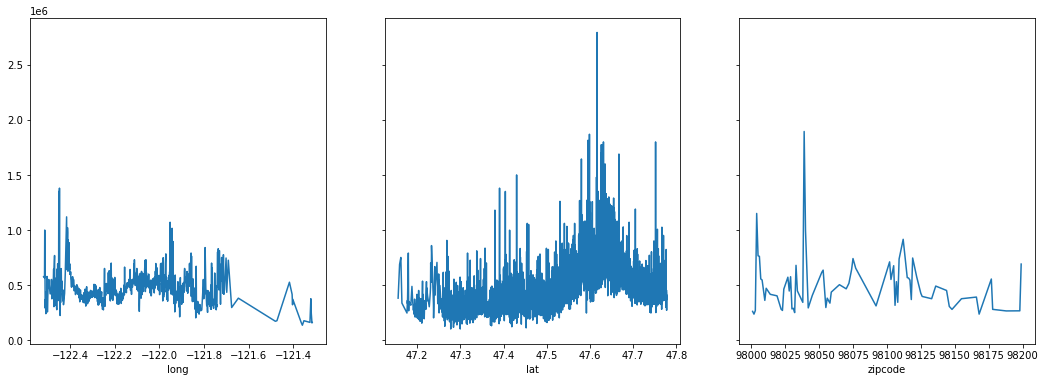

In [69]:
fig, axs = plt.subplots(1,3, sharey=True, figsize=(18,6))

df_pp.groupby('long').median()['price'].plot(ax=axs[0])
df_pp.groupby('lat').median()['price'].plot(ax=axs[1])
df_pp.groupby('zipcode').median()['price'].plot(ax=axs[2])


## Correlations and Multicolinearity

In [70]:
model_baseline = sm.OLS(df_pp[target], sm.add_constant(df_pp[continuous])).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2590.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:38:34   Log-Likelihood:            -2.9456e+05
No. Observations:               21597   AIC:                         5.892e+05
Df Residuals:                   21577   BIC:                         5.893e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.007e+06   2.97e+06      1.013      0.311   -2.81e+06    8.82e+06
grade          1.025e+05   2166.830     47.320      0.000    9.83e+04    1.07e+05
yr_renovated     25.6565      4.018      6.385      0.000      17.780      33.533
sqft_living      77.6026     18.215      4.260      0.000      41.899     113.306
sqft_basement    55.5877     18.885      2.943      0.003      18.572      92.604
sqft_lot15       -0.3251      0.074     -4.399      0.000      -0.470      -0.180
waterfront     6.323e+05   1.83e+04     34.605      0.000    5.96e+05    6.68e+05
sqft_above       80.7033     18.217      4.430      0.000      44.997     116.410
floor_count    -425.5278   1.07e+04     -0.040      0.968   -2.13e+04    2.05e+04
zipcode        -552.2685     33.272    -16.599      0.000    -617.484    -487.053
sqft_lot          0.1529      0.048      3.164      0.002       0.058       0.248
sqft_living15    22.1912      3.483      6.371      0.000      15.364      29.019
lat            6.085e+05   1.08e+04     56.194      0.000    5.87e+05     6.3e+05
view           5.624e+04   2135.673     26.336      0.000    5.21e+04    6.04e+04
bathrooms      3.047e+04   3257.886      9.353      0.000    2.41e+04    3.69e+04
condition      2.516e+04   2366.988     10.631      0.000    2.05e+04    2.98e+04
floors         8967.0279   1.21e+04      0.740      0.459   -1.48e+04    3.27e+04
long          -2.165e+05   1.33e+04    -16.273      0.000   -2.43e+05    -1.9e+05
yr_built      -2554.1493     78.226    -32.651      0.000   -2707.478   -2400.821
has_basement  -6143.4802   5348.363     -1.149      0.251   -1.66e+04    4339.707
==============================================================================
Omnibus:                    18850.287   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2057000.995
Skew:                           3.701   Prob(JB):                         0.00
Kurtosis:                      50.234   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

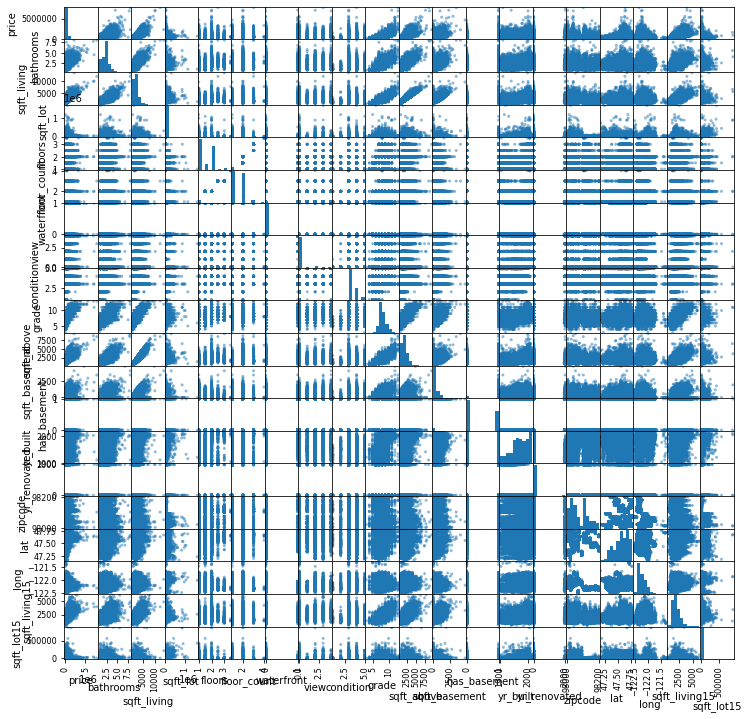

In [71]:
#visualize relationships
pd.plotting.scatter_matrix(df_pp, figsize  = [12, 12]);

In [72]:
def corr_heatmap(df,figsize=(6, 4)):
    '''Output a correlation heatmap from a Pandas DataFrame'''
    
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap,
                linewidths=0.3, cbar_kws={"shrink": .7},
                vmin=0, vmax=1, annot=True);

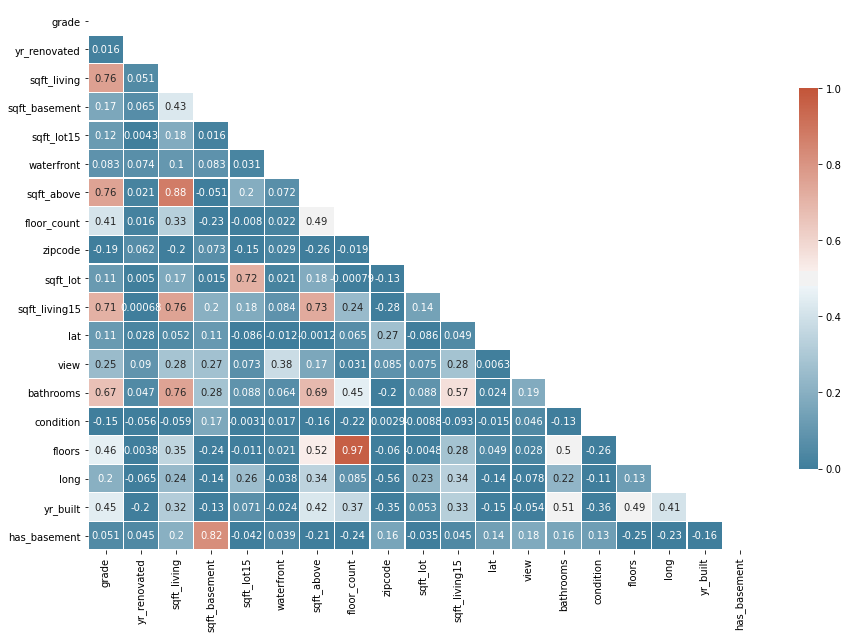

In [73]:
corr_heatmap(df_pp[continuous], figsize=(15, 10))

There are some really clear correlations.  Most obvious is `sqft_living` vs `sqft_above`.  As discovered earlier these are very similar values with sqft_living being the heated or cooled area of the house and sqft_above being all sqft excluding basement but including garage etc.  Look to see which has a greater correlation `price` and drop the other.

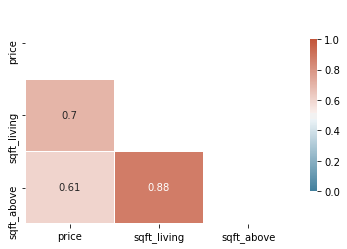

In [74]:
corr_heatmap(df_pp[['price', 'sqft_living', 'sqft_above']])

In [75]:
# sqft_living is more correlated with price so we will keep that one.
df_pp = df_pp.drop('sqft_above', axis=1)
dropped.add('sqft_above')
continuous.discard('sqft_above')

`sqft_lot` and 'sqft_lot15' / `sqft_living15` and `sqft_living15` are also highly correlated.  It seems like we could get additional information about price by using the data on the surrounding houses, but in this case it will make our coefficients less accurate so we will drop them.

In [76]:
df_pp = df_pp.drop(['sqft_living15', 'sqft_lot15'], axis=1)

dropped.add('sqft_living15')
dropped.add('sqft_lot15')
continuous.discard('sqft_living15')
continuous.discard('sqft_lot15')
df_pp.head(2)

,price,date,bathrooms,sqft_living,sqft_lot,floors,floor_count,waterfront,view,condition,grade,sqft_basement,has_basement,yr_built,yr_renovated,renovation_cat,zipcode,lat,long
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,1.00,1180,5650,1.0,1,0,0,3,7,0,0,1955,0,none,98178,47.5112,-122.257
6414100192,538000.0,2014-12-09,2.25,2570,7242,2.0,2,0,0,3,7,400,1,1951,1991,before_2000,98125,47.7210,-122.319


`sqft_living` and `grade` are borderline correlated.  One should be removed.  We will repeat the process to see which has a greater correlation with price.

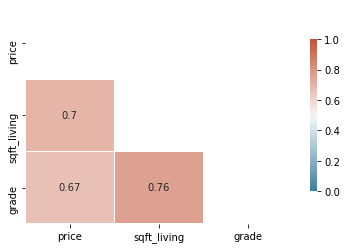

In [77]:
corr_heatmap(df_pp[['price', 'sqft_living', 'grade']])

`sqft_living` is slightly more correlated with `price` so we will keep that and drop `grade`

In [78]:
df_pp = df_pp.drop('grade', axis = 1)
dropped.add('grade')
continuous.discard('grade')

In [79]:
# drop floor_coiunt for now
continuous.discard('floor_count')
dropped.add('floor_count')

# drop has_basement for now
continuous.discard('has_basement')
dropped.add('has_basement')

#drop bathrooms for now
continuous.discard('bathrooms')
dropped.add('bathrooms')

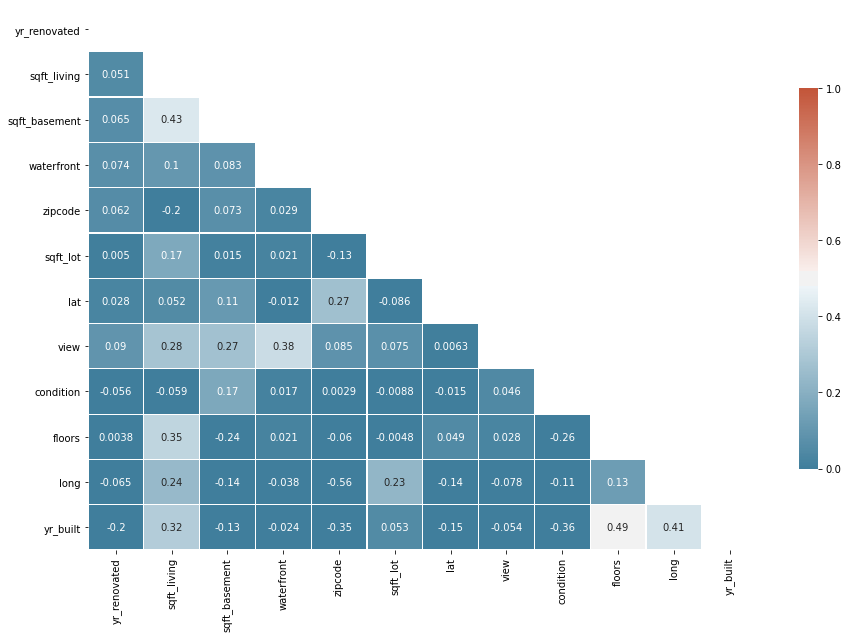

In [80]:
corr_heatmap(df_pp[continuous], figsize=(15, 10))

In [81]:
model_baseline = sm.OLS(df_pp[target], sm.add_constant(df_pp[continuous])).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3405.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:40:14   Log-Likelihood:            -2.9592e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21584   BIC:                         5.920e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.582e+05   3.08e+06      0.149      0.882   -5.58e+06     6.5e+06
yr_renovated     35.3570      4.231      8.356      0.000      27.064      43.650
sqft_living     276.5773      2.310    119.738      0.000     272.050     281.105
sqft_basement   -66.8451      4.453    -15.011      0.000     -75.573     -58.117
waterfront      6.04e+05   1.94e+04     31.085      0.000    5.66e+05    6.42e+05
zipcode        -690.4303     35.136    -19.650      0.000    -759.299    -621.562
sqft_lot         -0.0089      0.037     -0.239      0.811      -0.082       0.064
lat            7.225e+05   1.13e+04     64.063      0.000       7e+05    7.45e+05
view           7.428e+04   2216.284     33.514      0.000    6.99e+04    7.86e+04
condition      2.702e+04   2506.739     10.780      0.000    2.21e+04    3.19e+04
floors         3.246e+04   3661.478      8.867      0.000    2.53e+04    3.96e+04
long          -2.904e+05   1.38e+04    -21.081      0.000   -3.17e+05   -2.63e+05
yr_built      -1405.8641     70.355    -19.982      0.000   -1543.765   -1267.963
==============================================================================
Omnibus:                    15903.228   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           968842.625
Skew:                           2.967   Prob(JB):                         0.00
Kurtosis:                      35.271   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multicolinearity

In [82]:
def multicolinearity_check(df):
    '''Takes a DataFrame and prints variance_inflation_vactor for all cols'''
    vifs = []
    for i, col in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        vifs.append(vif)
    vifs = pd.Series(vifs, index=df.columns)
    vifs = vifs.sort_values(ascending=False)
    print(vifs)

In [83]:
multicolinearity_check(df_pp[continuous])

zipcode          1.543974e+06
long             1.304401e+06
lat              1.330381e+05
yr_built         7.680948e+03
condition        3.426532e+01
floors           1.494847e+01
sqft_living      1.224005e+01
sqft_basement    2.454888e+00
view             1.440273e+00
sqft_lot         1.231849e+00
waterfront       1.180856e+00
yr_renovated     1.134233e+00
dtype: float64


In [84]:
# try just centering the geographic data
df_pp['lat_centered'] = df_pp['lat'] - df_pp['lat'].mean()
continuous.add('lat_centered')
continuous.discard('lat')
dropped.add('lat')

df_pp['long_centered'] = df_pp['long'] - df_pp['long'].mean()
continuous.add('long_centered')
continuous.discard('long')
dropped.add('long')

df_pp['zip_centered'] = df_pp['zipcode'] - df_pp['zipcode'].mean()
continuous.add('zip_centered')
continuous.discard('zipcode')
dropped.add('zipcode')

multicolinearity_check(df_pp[continuous])

yr_built         48.862954
condition        29.967819
floors           13.834490
sqft_living      12.615631
sqft_basement     2.522351
long_centered     1.652969
zip_centered      1.591475
view              1.449133
sqft_lot          1.237442
waterfront        1.180862
lat_centered      1.107275
yr_renovated      1.055728
dtype: float64


In [85]:
# try centering

df_pp['yr_built_centered'] = df_pp['yr_built'] - df_pp['yr_built'].mean()
continuous.discard('yr_built')
dropped.add('yr_built')
continuous.add('yr_built_centered')

multicolinearity_check(df_pp[continuous])

floors               12.886255
sqft_living          12.519175
condition            10.631001
sqft_basement         2.523822
yr_built_centered     1.975391
long_centered         1.738157
zip_centered          1.624311
view                  1.444698
sqft_lot              1.239759
waterfront            1.180670
yr_renovated          1.131035
lat_centered          1.127659
dtype: float64


In [86]:
# try centereing

df_pp['floors_centered'] = df_pp['floors'] - df_pp['floors'].mean()

continuous.discard('floors')
dropped.add('floors')
continuous.add('floors_centered')

multicolinearity_check(df_pp[continuous])

sqft_living          10.752066
condition             7.349815
sqft_basement         2.378874
yr_built_centered     1.862348
floors_centered       1.780790
long_centered         1.730526
zip_centered          1.600067
view                  1.445561
sqft_lot              1.241577
waterfront            1.180674
lat_centered          1.129635
yr_renovated          1.117958
dtype: float64


In [87]:
# try centereing

df_pp['sqft_living_centered'] = df_pp['sqft_living'] - df_pp['sqft_living'].mean()

continuous.discard('sqft_living')
dropped.add('sqft_living')
continuous.add('sqft_living_centered')

multicolinearity_check(df_pp[continuous])

sqft_basement           2.517670
sqft_living_centered    2.050215
condition               1.976373
floors_centered         1.787398
yr_built_centered       1.767167
long_centered           1.737203
zip_centered            1.619680
view                    1.451703
sqft_lot                1.232920
waterfront              1.180760
lat_centered            1.127102
yr_renovated            1.103631
dtype: float64


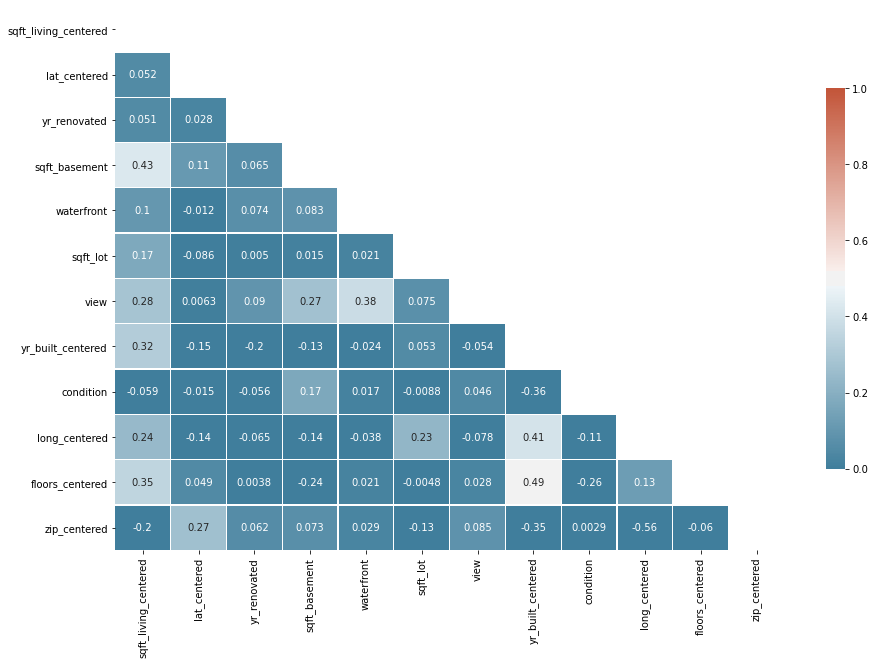

In [88]:
# Recheck correlations
corr_heatmap(df_pp[continuous], figsize=(15, 10))

# Baseline Model

In [97]:
def cross_validate_rmse(X, y, cv=5):

    linreg = LinearRegression()

    mse = make_scorer(mean_squared_error)
    cvs = cross_val_score(linreg, X, y, cv=5, scoring=mse)
    return np.sqrt(cvs).mean()

In [155]:
model_scores = {}

def quicktest(X, y, model_name=False, verbose=True):
    model_test = sm.OLS(y, sm.add_constant(X)).fit()
    if verbose:
        print(model_test.summary())
    
    rmse = cross_validate_rmse(X = X, y =y)
    print('--')
    print('rmse:', rmse, 'r2_adj', model_test.rsquared_adj)
    
    if model_name:
        model_scores[model_name] = (model_test.rsquared_adj, rmse)
    
    if verbose:
        if len(model_scores) > 0:
            df = pd.DataFrame.from_dict(model_scores, orient='index')
            #print(df)
            df.columns = ['r2_adj', 'rmse']
            print(df.sort_values(by='r2_adj', ascending=False))
        else:
            print('No stored models')
    return rmse, model_test.rsquared_adj

In [99]:
quicktest(df_pp[continuous],df_pp[target],'baseline' )

#model_baseline = sm.OLS(df_pp[target], sm.add_constant(df_pp[continuous])).fit()
#model_baseline.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3405.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:45:18   Log-Likelihood:            -2.9592e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21584   BIC:                         5.920e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.435e+05 

## Setup stepwise feature selection

In [100]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return (included, excluded)

In [101]:
ss_included, ss_excluded = stepwise_selection(df_pp[continuous], df_pp[target], verbose=True)
print('resulting features:')
print(ss_included)
print('removed features:')
print(ss_excluded)

Add  sqft_living_centered           with p-value 0.0
Add  lat_centered                   with p-value 0.0
Add  view                           with p-value 0.0
Add  waterfront                     with p-value 5.90567e-209
Add  yr_built_centered              with p-value 1.43087e-130
Add  sqft_basement                  with p-value 5.23341e-63
Add  long_centered                  with p-value 8.83639e-51
Add  zip_centered                   with p-value 6.67301e-89
Add  floors_centered                with p-value 8.11672e-20
Add  condition                      with p-value 5.52348e-22
Add  yr_renovated                   with p-value 6.75783e-17
resulting features:
['sqft_living_centered', 'lat_centered', 'view', 'waterfront', 'yr_built_centered', 'sqft_basement', 'long_centered', 'zip_centered', 'floors_centered', 'condition', 'yr_renovated']
removed features:
['sqft_lot']


## Setup Recursive feature elimination

In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def myRFE(X, y, n):
    '''
    Runs a Recursive Feature Elimination on a Pandas dataframe
    
    Input:
        X: a Pandas Dataframe of the training data
        y: a Pandas Series of the training targets 
        n: the number of features to select
    
    Output:
        (selected, dropped): selected is the columns that were selected for 
        inclusing in the model
        dropped is a list of columns that were dropped form the model'''
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select=n)
    selector = selector.fit(X, y)
    
    selected = list(X.columns[selector.support_])
    dropped = list(X.columns[~selector.support_])
    
    return (selected, dropped)

In [103]:
rfe_cols, rfe_dropped = myRFE(X=df_pp[continuous], y=df_pp[target], n=11)
rfe_cols

['sqft_living_centered',
 'lat_centered',
 'yr_renovated',
 'sqft_basement',
 'waterfront',
 'view',
 'yr_built_centered',
 'condition',
 'long_centered',
 'floors_centered',
 'zip_centered']

In [104]:
model_baseline = sm.OLS(df_pp[target], sm.add_constant(df_pp[ss_included])).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3715.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:45:38   Log-Likelihood:            -2.9592e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21585   BIC:                         5.920e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.434e+05   8691.001     51.015      0.000    4.26e+05     4.6e+05
sqft_living_centered   276.4974      2.285    120.980      0.000     272.018     280.977
lat_centered          7.227e+05   1.12e+04     64.241      0.000    7.01e+05    7.45e+05
view                  7.425e+04   2213.240     33.548      0.000    6.99e+04    7.86e+04
waterfront             6.04e+05   1.94e+04     31.088      0.000    5.66e+05    6.42e+05
yr_built_centered    -1404.9353     70.246    -20.000      0.000   -1542.623   -1267.248
sqft_basement          -66.7818      4.445    -15.024      0.000     -75.495     -58.069
long_centered        -2.909e+05   1.36e+04    -21.446      0.000   -3.18e+05   -2.64e+05
zip_centered          -690.5869     35.129    -19.659      0.000    -759.442    -621.732
floors_centered       3.252e+04   3653.323      8.902      0.000    2.54e+04    3.97e+04
condition             2.703e+04   2506.451     10.785      0.000    2.21e+04    3.19e+04
yr_renovated            35.3629      4.231      8.358      0.000      27.070      43.656
==============================================================================
Omnibus:                    15905.113   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           969494.260
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      35.282   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
cross_validate_rmse(X = df_pp[continuous], y =df_pp[target])

217110.70178880496

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(df_pp[target],
                   model_baseline.predict(df_pp[continuous]),
                   squared = False) # Gives RMSE

# r2_score(df_pp[target], reg.predict())

# THATS TERRIBLE -- Ahh has to be done on test data (still bad)
# Try with cross validation

505440489.8841267

## Evaluate model assumptions

1. Independence - Observations are Independent (Done previously)
1. Linearity - The relationship between X and the mean of Y is linear
1. Normality- 1) Model residuals should follow a normal distribution. 2) For any fixed value of X, Y is normally distributed.
    * Histogram
    * QQ Plot
1. Homoscedasticity - The variance of residual is the same for any value of X
    * Scatterplot 

### Linearity

In [107]:
def cross_validate_rmse(X, y, cv=5):

    linreg = LinearRegression()

    mse = make_scorer(mean_squared_error)
    cvs = cross_val_score(linreg, X, y, cv=5, scoring=mse)
    return np.sqrt(cvs).mean()

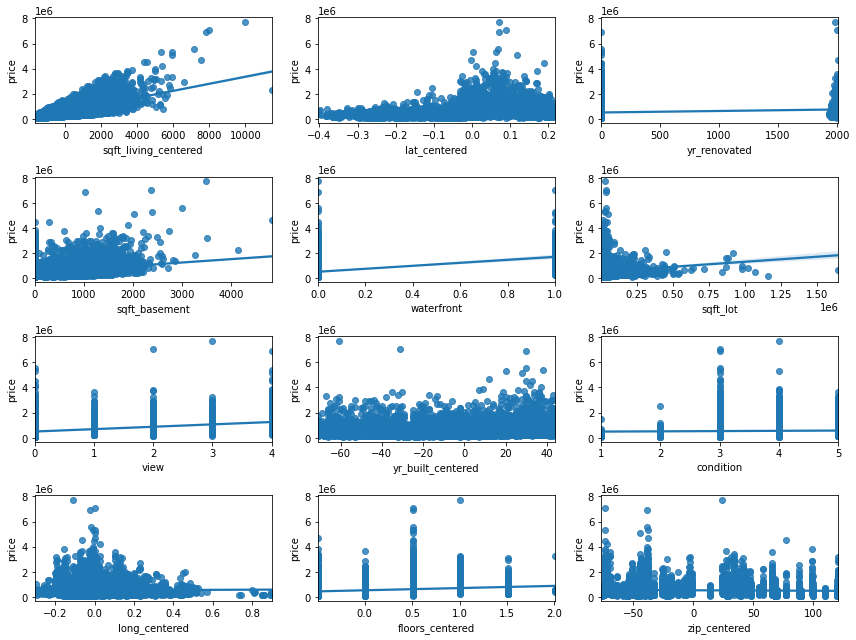

In [108]:
# plot all variables against price to check for Linearity
#import math

rows = len(continuous) // 3 + int(np.ceil(len(continuous) % 3))

fig, axs = plt.subplots(rows, 3, figsize=(rows*3,9))
axs = np.array(axs).flatten()
    
for n, col in enumerate(continuous):
    #df_pp.plot.scatter(x=col, y=target, ax = axs[n])
    sns.regplot(x=col, y=target, ax=axs[n], data=df_pp)
    plt.xlabel(col)

plt.tight_layout()

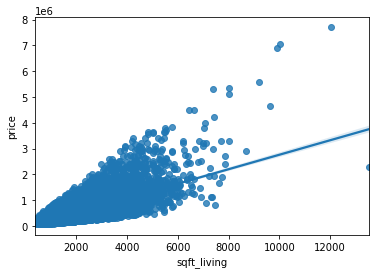

In [109]:

testx = df_pp['sqft_living']
testy = df_pp[target]

sns.regplot(x=testx, y=testy)

The relationship is very heteroscedastic. Try to improve with a log transform.

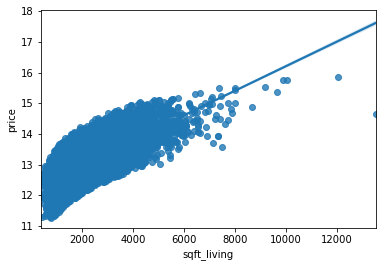

In [110]:
testx = (df_pp['sqft_living']) 
testy = np.log(df_pp[target])

sns.regplot(x=testx, y=testy)

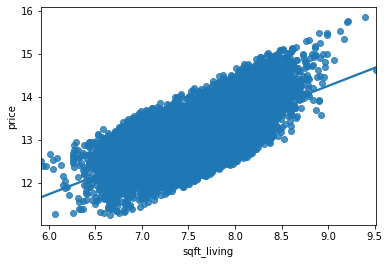

In [111]:
#try to logtx price as well
testx = np.log(df_pp['sqft_living']) 
testy = np.log(df_pp[target])

sns.regplot(x=testx, y=testy)

That looks a lot better.  Lets test to see the effect on $R^{2}$

In [112]:
df_pp['price_log'] = np.log(df_pp['price'])

df_pp['sqft_living_log'] = np.log(df_pp['sqft_living'])
#recenter the log values to prevent multicolinearity
df_pp['sqft_living_centered_log'] = df_pp['sqft_living_log'] - df_pp['sqft_living_log'].mean()


print('Simple Linear Model sqft_living -> price')
quicktest(df_pp[['sqft_living']], df_pp[target])

print("*******************************************************************************************************")
print('Simple Linear Model log(sqft_living) -> price')
quicktest(df_pp[['sqft_living_centered_log']], df_pp['price'])

print("*******************************************************************************************************")
print('Simple Linear Model log(sqft_living) -> price')
quicktest(df_pp[['sqft_living_centered']], df_pp['price_log'])

print("*******************************************************************************************************")
print('Simple Linear Model log(sqft_living) -> price')
quicktest(df_pp[['sqft_living_centered_log']], df_pp['price_log'])

Simple Linear Model sqft_living -> price
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:46:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const    

rmse: 0.38863270259876864
--
            r2_adj           rmse
baseline  0.654163  217110.701789


In simple model with only one independent variable sqft_living the mode performs best with none of the variables log transformed.

Now to try it with the rest of the independent variables

In [113]:
# Create testing set
continuous_test = continuous.copy()

print('Multiple Linear Model sqft_living -> price')
quicktest(df_pp[continuous_test], df_pp['price'])

print("*******************************************************************************************************")
print('Multiple Linear Model sqft_living -> log(price)')
quicktest(df_pp[continuous_test], df_pp['price_log'])

continuous_test.discard('sqft_living_centered')
continuous_test.add('sqft_living_centered_log')

print("*******************************************************************************************************")
print('Multiple Linear Model log(sqft_living) -> price')
quicktest(df_pp[continuous_test], df_pp['price'])

print("*******************************************************************************************************")
print('Multiple Linear Model log(sqft_living) -> log(price)')
quicktest(df_pp[continuous_test], df_pp['price_log'])






Multiple Linear Model sqft_living -> price
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3405.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:46:20   Log-Likelihood:            -2.9592e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21584   BIC:                         5.920e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     4180.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:46:20   Log-Likelihood:                -3822.2
No. Observations:               21597   AIC:                             7670.
Df Residuals:                   21584   BIC:                             7774.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Interestingly the log transform made the model perform worse, but the log transform on price helped the model significantly.  We will come back to that later.  

### Normality

In [114]:
def test_normality(resid):
    sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True);
    
    # JB test
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model_baseline.resid)
    print(pd.Series(test, index=name))

Jarque-Bera    969494.259503
Prob                0.000000
Skew                2.967841
Kurtosis           35.282087
dtype: float64


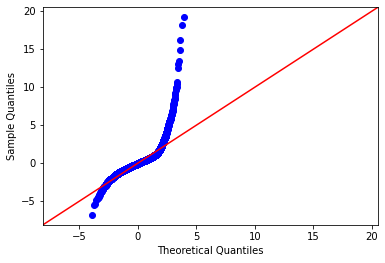

In [115]:
test_normality(model_baseline.resid)

The pvalue is below 0.5 so $H_0$ that the errors are normally distributed must be rejected.

The model does not meet the Normality Assumption

### Homoscedasticity

## Model 2: Drop price outliers

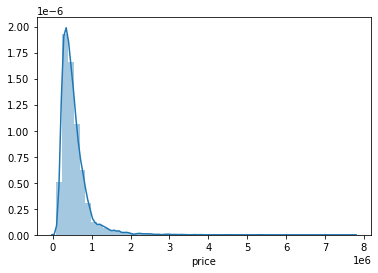

In [116]:
sns.distplot(df['price'])

In [117]:
# calculate z score for price
def standardize(x):
    '''Standardize a Pandas Series (Std Normal Dist)'''
    return (x - x.mean()) / x.std()

print("Price threshold:", df[standardize(df['price']) > 3]['price'].min())
print("Number of rows to be dropped:", len(df[standardize(df['price']) > 3]))
print("Percentage of rows to be dropped:", 
      len(df[standardize(df['price']) > 3]) / len(df))

Price threshold: 1650000.0
Number of rows to be dropped: 406
Percentage of rows to be dropped: 0.01879890725563736


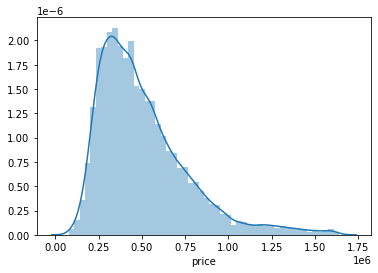

In [118]:
len(df[df['price'] < 1650000]['price'])
sns.distplot(df[df['price'] < 1650000]['price'])

In [119]:
df_m2 = df_pp[standardize(df_pp['price']) < 3]
len(df_m2)

21191

In [120]:
quicktest(df_m2[continuous],df_m2[target],'Model 2')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3146.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:46:22   Log-Likelihood:            -2.8340e+05
No. Observations:               21191   AIC:                         5.668e+05
Df Residuals:                   21178   BIC:                         5.669e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.187e+05 

# Model 3 [geographical data]
Work with zipcode and long lat data to improve model

In [121]:
continuous

{'condition',
 'floors_centered',
 'lat_centered',
 'long_centered',
 'sqft_basement',
 'sqft_living_centered',
 'sqft_lot',
 'view',
 'waterfront',
 'yr_built_centered',
 'yr_renovated',
 'zip_centered'}

In [ ]:
#group zipcodes by mean saleprice
rmses = []
r2_adjs = []
binsizes = []
for bins in range(2,20):
    bins *= 2
    
    print(f"testing zipcodes with {bins} bins")
    zip_means = df_pp[['price', 'zipcode']].groupby('zipcode').mean()
    zip_cats = pd.qcut(zip_means['price'], bins) # labels=[1,2,3,4])
    df_pp['zipcode_cat'] = df_pp['zipcode'].map(zip_cats)

    #plt.figure(figsize=(10,10))
    #sns.scatterplot(x='long', y='lat', 
    #                alpha= .5, hue='zipcode_cat', palette='RdYlGn',
    #                data=df_pp)

    cols_m3 = continuous.copy()
    cols_m3.discard('zip_centered')

    # create dummy variables
    dummies = pd.get_dummies(df_pp['zipcode_cat'], prefix='zipcat', 
                             drop_first=True)

    df_pp = df_pp.combine_first(dummies)

    cols_m3.update(dummies.columns)
    #print(cols_m3)
    
    #print('X:\n ----->')
    #print(df_pp[cols_m3])

    rmse, r2_adj = quicktest(df_pp[cols_m3], df_pp[target], verbose=False)
    rmses.append(rmse)
    r2_adjs.append(r2_adj)
    binsizes.append(bins)

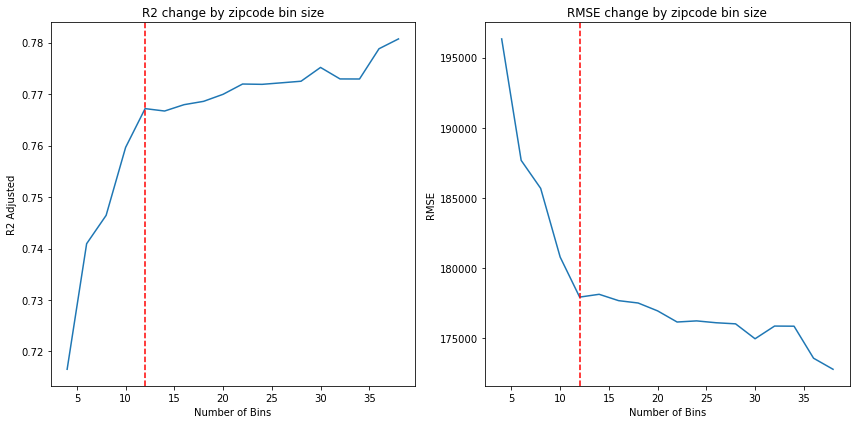

In [147]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

plt.sca(ax1)
plt.plot(binsizes, r2_adjs, label='R2_adj')
plt.title('R2 change by zipcode bin size')
plt.ylabel('R2 Adjusted')
plt.xlabel('Number of Bins')
plt.axvline(x=12, c='r', ls='--' )

plt.sca(ax2)
plt.plot(binsizes, rmses, label='rmse')
plt.title('RMSE change by zipcode bin size')
plt.ylabel('RMSE')
plt.xlabel('Number of Bins')
plt.axvline(x=12, c='r', ls='--' )

plt.tight_layout()

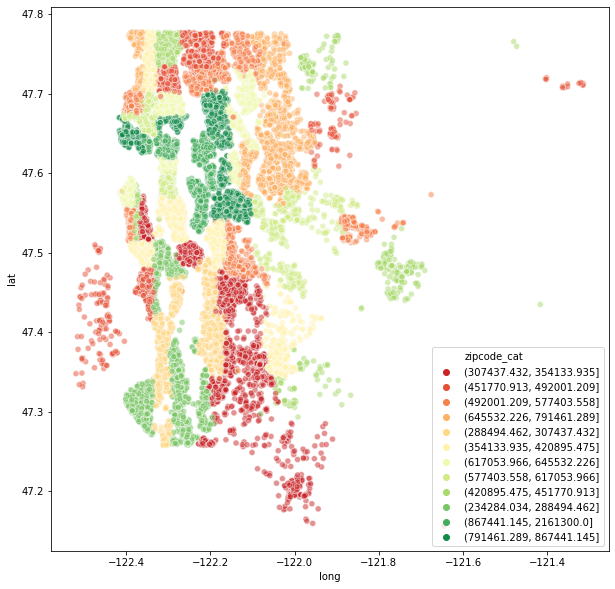

In [148]:
    zip_means = df_pp[['price', 'zipcode']].groupby('zipcode').mean()
    zip_cats = pd.qcut(zip_means['price'], 12) # labels=[1,2,3,4])
    df_pp['zipcode_cat'] = df_pp['zipcode'].map(zip_cats)

    plt.figure(figsize=(10,10))
    sns.scatterplot(x='long', y='lat', 
                   alpha= .5, hue='zipcode_cat', palette='RdYlGn',
                   data=df_pp)

In [156]:
cols_m3 = continuous.copy()
cols_m3.discard('zip_centered')

# create dummy variables
dummies = pd.get_dummies(df_pp['zipcode_cat'], prefix='zipcat', 
                         drop_first=True)

df_pp = df_pp.combine_first(dummies)

cols_m3.update(dummies.columns)

quicktest(df_pp[cols_m3], df_pp[target], model_name='Model 3')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     3236.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:14:54   Log-Likelihood:            -2.9164e+05
No. Observations:               21597   AIC:                         5.833e+05
Df Residuals:                   21574   BIC:                         5.835e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

(177917.35966746463, 0.7671900952400009)

_________________________________________________________________________


In [ ]:
# reduce grade to 3 bins

df_pp['grade_cat'] =  pd.qcut(df_pp['grade'], 3, labels=[1,2,3])

In [ ]:
# segment and regplot
for grade in df_pp['grade']:
    sns.regplot(x='sqft_above', y='price', scatter_kws={'alpha':.1},
                data = df_pp[df_pp['grade'] == grade])

In [ ]:
df_pp[df_pp['grade_cat'] == 1]

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long', y='lat', 
                alpha= .5, hue='zipcode_cat', palette='RdYlGn',
                data=df_pp)

In [ ]:
cols_m3 = continuous.copy()
cols_m3.discard('zip_centered')

# create dummy variables
dummies = pd.get_dummies(df_pp['zipcode_cat'], prefix='zipcat', 
                         drop_first=True)

df_pp = pd.concat([df_pp, dummies], axis = 1)

cols_m3.update(dummies.columns)
cols_m3

In [ ]:
quicktest(df_pp[cols_m3], df_pp[target])

In [ ]:
np.sort(df['grade'].unique())

In [ ]:
# segment and regplot

fig = plt.figure(figsize = (12,9))

for grade in np.sort(df['grade'].unique()):
    sns.regplot(x='sqft_above', y='price', scatter_kws={'alpha':0.01},
                label='grade '+str(grade), ax=plt.gca(),
                data = df_pp[df_pp['grade'] == grade])
legend = plt.legend()
for lh in legend.legendHandles: 
    lh.set_alpha(1)

In [ ]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(horse_1, origin_1['mpg'],  color='blue', alpha=0.3, label = 'origin = 1')
plt.scatter(horse_2, origin_2['mpg'],  color='red', alpha=0.3, label = 'origin = 2')
plt.scatter(horse_3, origin_3['mpg'],  color='orange', alpha=0.3, label = 'origin = 3')

plt.plot(horse_1, pred_1, color='blue', linewidth=2)
plt.plot(horse_2, pred_2, color='red', linewidth=2)
plt.plot(horse_3, pred_3, color='orange', linewidth=2)
plt.ylabel('mpg')
plt.xlabel('horsepower')
plt.legend();

In [ ]:
X = X.drop('grade', axis=1)

In [ ]:
#recheck
corr_heatmap(X, figsize=(11, 9))

In [ ]:
# all rows should show 1 for correlation with itself and nothing else
(X.corr() > 0.75).sum()

In [ ]:
X = X.drop('date', axis = 1)

In [ ]:
conts = list(X.dtypes[(X.dtypes != 'category')].index)

In [ ]:
X[conts].info()

In [ ]:
## Normalize continuous Variables
Normalize only the variables that are definitively continuous.  Others will be tested in model building.

In [ ]:
# this is easier than using sklearn.


def normalize(x):
    '''Normalize a Pandas Series (0-1)'''
    return (x - x.min()) / (x.max() - x.min())
    

In [ ]:
df_pp.dtypes[df_pp.dtypes.isin(['int64', 'float64'])]

In [ ]:
standardize(df['price'])

In [ ]:
normalize(df['price'])

In [ ]:
df.describe()

In [ ]:
# Does floors include basement?
df[(df['sqft_basement'] > 0) & (df['floors'] == 1)][['sqft_basement', 'floors']]

In [ ]:
import folium

In [ ]:
# does the number of floors include the basement?

In [ ]:
d